In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Globals
ORANGE = '#F2BE4A'
RED = '#ef4123'
GRAY = '#545453'

# Import Data

In [2]:
data = pd.read_csv('./data/penguins_size.csv')
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


# Univariate Analysis

In [3]:
print(data.shape)
data.head()

(344, 7)


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Remove Unnecessary Features

In [4]:
drop_features = {"sex"}
data = data.drop(columns=drop_features)
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0


## Handeling Types of Features

In [5]:
data.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
dtype: object

In [6]:
categorical_features = {"species", "island"}
for feature in categorical_features:
    data[feature] = data[feature].astype("category")

In [7]:
data.dtypes

species              category
island               category
culmen_length_mm      float64
culmen_depth_mm       float64
flipper_length_mm     float64
body_mass_g           float64
dtype: object

# Distribution

## Distribution Points

In [8]:
data['flipper_length_mm'].describe()

count    342.000000
mean     200.915205
std       14.061714
min      172.000000
25%      190.000000
50%      197.000000
75%      213.000000
max      231.000000
Name: flipper_length_mm, dtype: float64

## Output Distribution

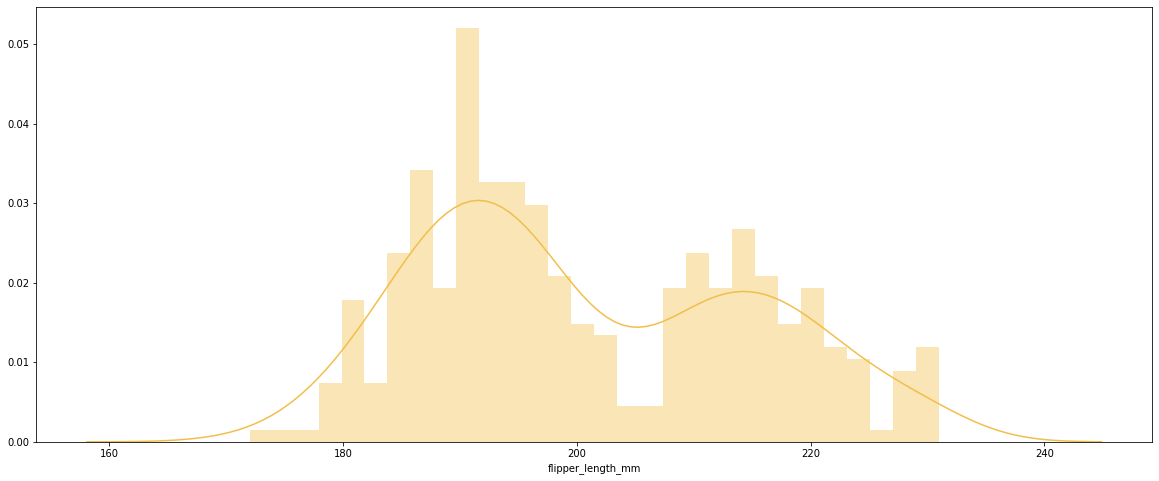

In [26]:
plt.figure(figsize=(20, 8))
sb.distplot(data['flipper_length_mm'], color=ORANGE, bins=30, hist_kws={'alpha': 0.4});

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B6F0297408>,
      dtype=object)

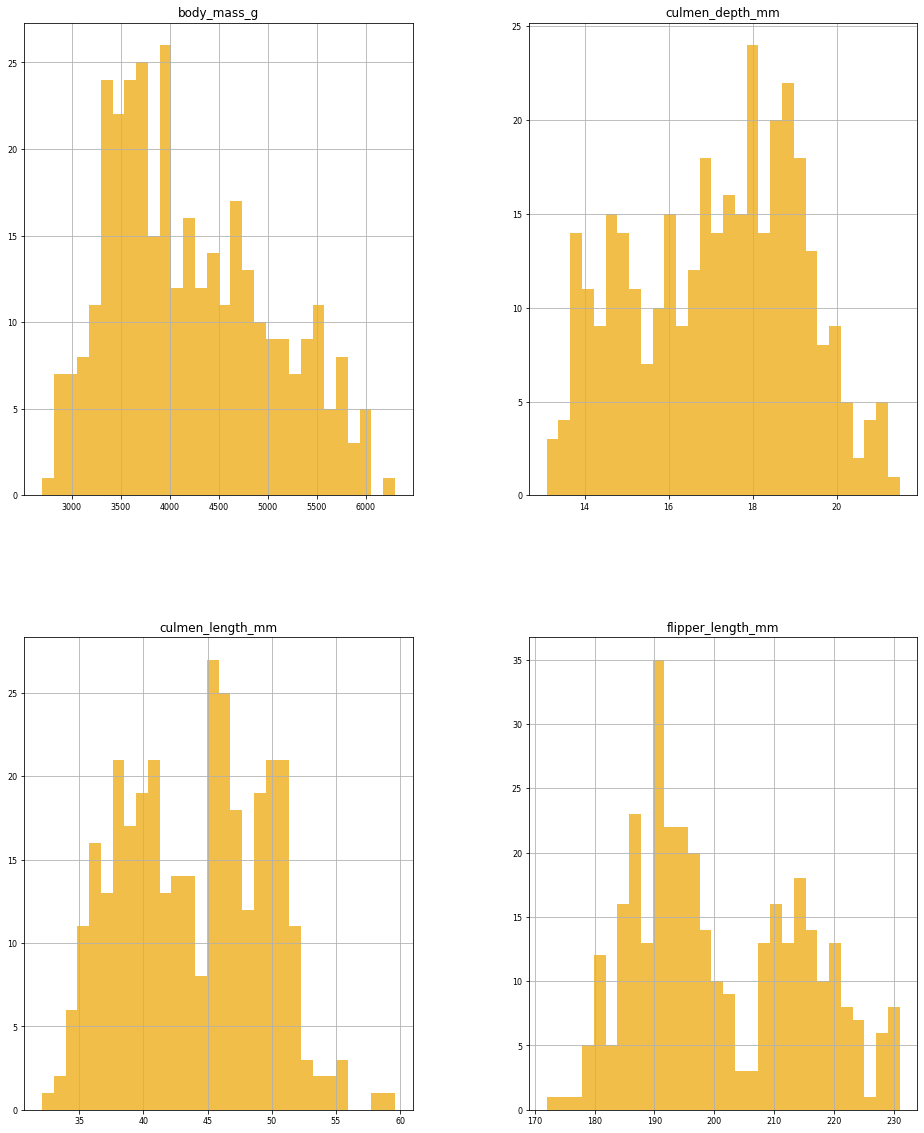

In [18]:
numerical_fetures = data.select_dtypes(include = ['float64', 'int64'])
numerical_fetures.hist(figsize=(16, 20), color = ORANGE, bins=30, xlabelsize=8, ylabelsize=8)

In [14]:
data.median()

culmen_length_mm       44.45
culmen_depth_mm        17.30
flipper_length_mm     197.00
body_mass_g          4050.00
dtype: float64

In [15]:
data.mode()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,Biscoe,41.1,17.0,190.0,3800.0


In [16]:
data.mean()

culmen_length_mm       43.921930
culmen_depth_mm        17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
dtype: float64

In [19]:
data['flipper_length_mm'].describe()

count    342.000000
mean     200.915205
std       14.061714
min      172.000000
25%      190.000000
50%      197.000000
75%      213.000000
max      231.000000
Name: flipper_length_mm, dtype: float64

In [20]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


# Detecting Outliers

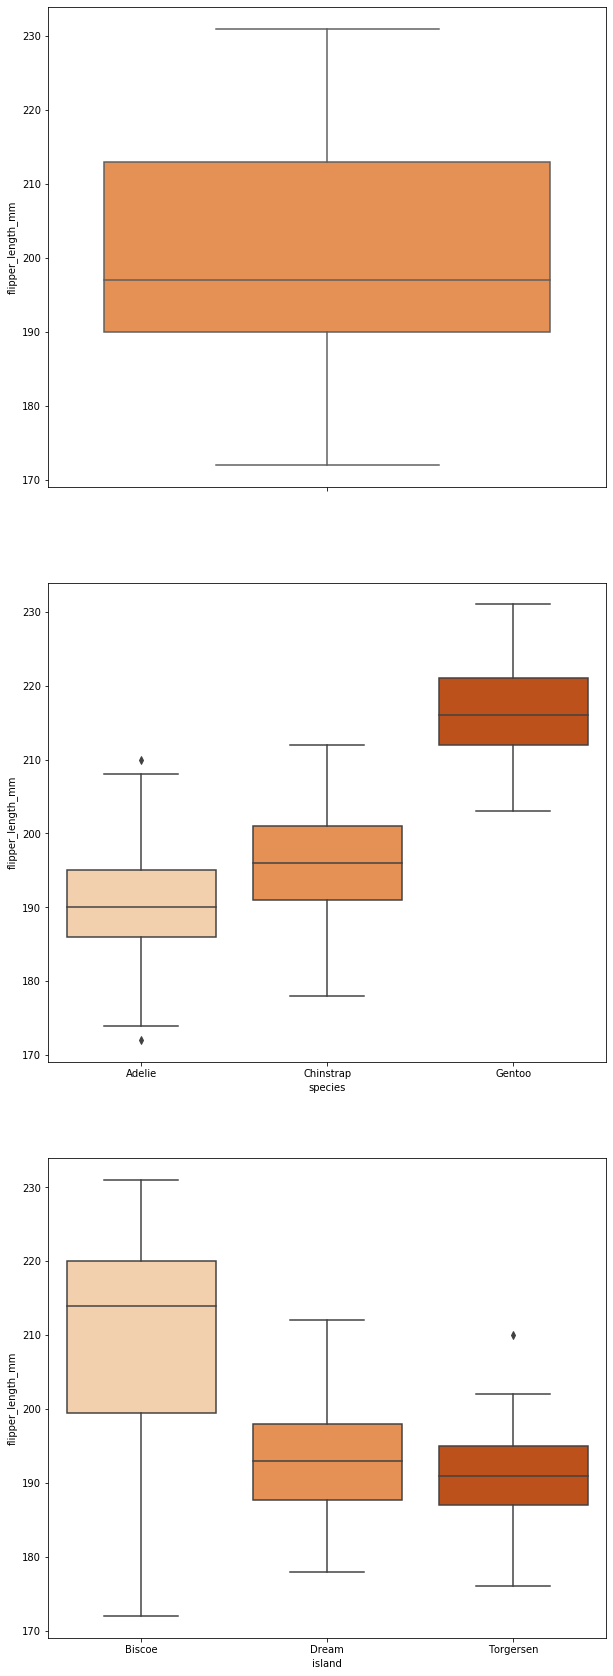

In [24]:
fig, axes = plt.subplots(nrows=3,ncols=1)
fig.set_size_inches(10, 30)
sb.boxplot(data=data,y="flipper_length_mm",orient="v",ax=axes[0], palette="Oranges")
sb.boxplot(data=data,y="flipper_length_mm",x="species",orient="v",ax=axes[1], palette="Oranges")
sb.boxplot(data=data,y="flipper_length_mm",x="island",orient="v",ax=axes[2], palette="Oranges")

## Correlation Matrix

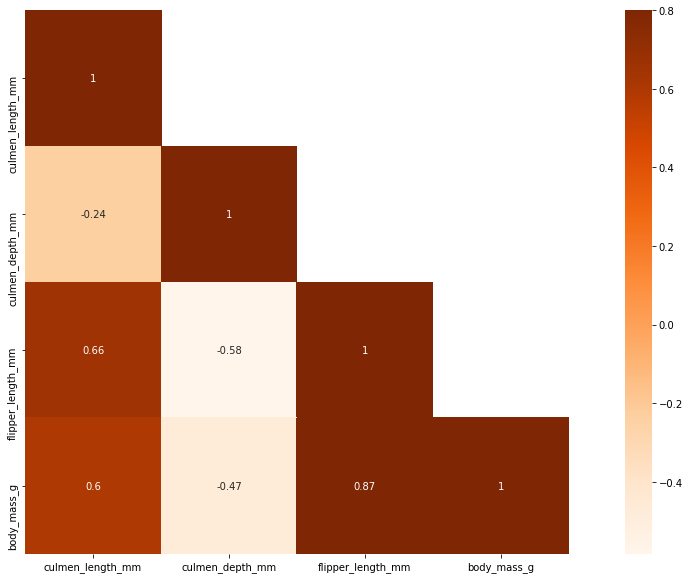

In [25]:
corrMatt = data.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sb.heatmap(corrMatt, cmap="Oranges", mask=mask,vmax=.8, square=True,annot=True)